In [13]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize 
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision = 5, suppress = True, formatter={'float':lambda x: f'{x:6.3f}'})
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
raw = pd.read_csv(url, index_col = 0, parse_dates=True).dropna()
#specifica il tasso a breve senza rischio
r = 0.005

#definisce il portafoglio di mercato
market = '.SPX'

rets = np.log(raw / raw.shift(1)).dropna()

res = pd.DataFrame()

for sym in rets.columns[:4]:
    print('\n' + sym)
    print(54 * '=')
    for year in range(2010, 2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_[market].mean() * 252
        #deriva il beta del titolo
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov / var 
        rets_ = rets.loc[f'{year + 1}-01-01':f'{year + 1}-12-31']
        muM = rets_[market].mean() * 252
        #calcola il rendimento atteso in base al beta dell'anno precedente
        #e alla performance del portafoglio di mercato dell'anno in corso
        mu_capm = r + beta * (muM - r)
        #calcola la performance realizzata dal titolo per l'anno in corso
        mu_real = rets_[sym].mean() * 252
        #raccoglie e stampa tutti i risultati
        res = res.append(pd.DataFrame({'symbol': sym,
                                       'mu_capm': mu_capm,
                                        'mu_real': mu_real},
                                        index=[year + 1]),
                                        sort=True)
        print('{} | beta: {:.3f} | mu_capm: {:6.3f} | mu_real: {:6.3f}'
                .format(year + 1, beta, mu_capm, mu_real))
                         

<ipython-input-13-fcc02ed63e12>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')



AAPL.O
2011 | beta: 1.052 | mu_capm: -0.000 | mu_real:  0.228
2012 | beta: 0.764 | mu_capm:  0.098 | mu_real:  0.275
2013 | beta: 1.266 | mu_capm:  0.327 | mu_real:  0.053
2014 | beta: 0.630 | mu_capm:  0.070 | mu_real:  0.320
2015 | beta: 0.833 | mu_capm: -0.005 | mu_real: -0.047
2016 | beta: 1.144 | mu_capm:  0.103 | mu_real:  0.096
2017 | beta: 1.009 | mu_capm:  0.180 | mu_real:  0.381
2018 | beta: 1.379 | mu_capm: -0.091 | mu_real: -0.071
2019 | beta: 1.252 | mu_capm:  0.316 | mu_real:  0.621

MSFT.O
2011 | beta: 0.890 | mu_capm:  0.001 | mu_real: -0.072
2012 | beta: 0.816 | mu_capm:  0.104 | mu_real:  0.029
2013 | beta: 1.109 | mu_capm:  0.287 | mu_real:  0.337
2014 | beta: 0.876 | mu_capm:  0.095 | mu_real:  0.216
2015 | beta: 0.955 | mu_capm: -0.007 | mu_real:  0.178
2016 | beta: 1.249 | mu_capm:  0.113 | mu_real:  0.113
2017 | beta: 1.224 | mu_capm:  0.217 | mu_real:  0.321
2018 | beta: 1.303 | mu_capm: -0.086 | mu_real:  0.172
2019 | beta: 1.442 | mu_capm:  0.364 | mu_real:  

<ipython-input-13-fcc02ed63e12>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-13-fcc02ed63e12>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-13-fcc02ed63e12>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-13-fcc02ed63e12>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append(pd.DataFrame({'symbol': sym,
<ipython-input-13-fcc02ed63e12>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [14]:
sym = 'AMZN.O'
res[res['symbol'] == sym].corr()

<ipython-input-14-b4cb276b9e07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  res[res['symbol'] == sym].corr()


,mu_capm,mu_real
mu_capm,1.000000,-0.004826
mu_real,-0.004826,1.000000


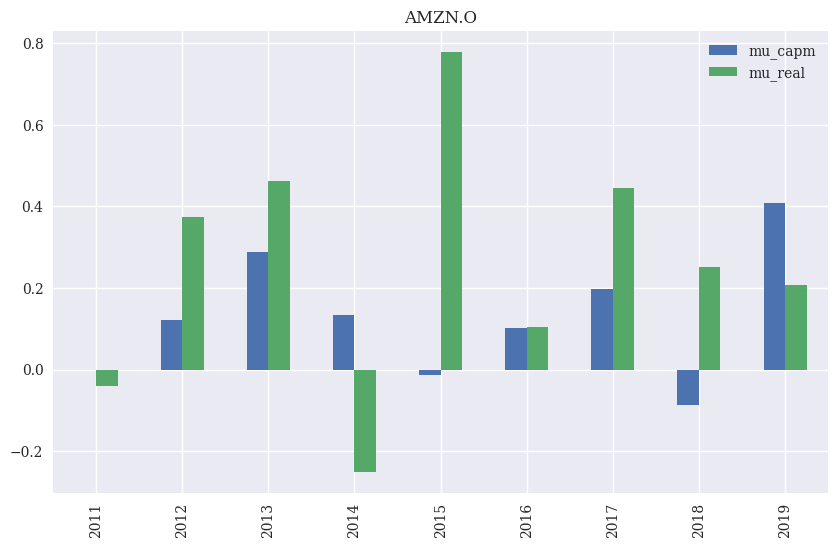

In [15]:
res[res['symbol'] == sym].plot(kind='bar',
                figsize=(10, 6), title=sym);

In [16]:
grouped = res.groupby('symbol').mean()
grouped

,mu_capm,mu_real
symbol,,
AAPL.O,0.110855,0.206158
AMZN.O,0.128223,0.259395
INTC.O,0.117929,0.116180
MSFT.O,0.120844,0.192655


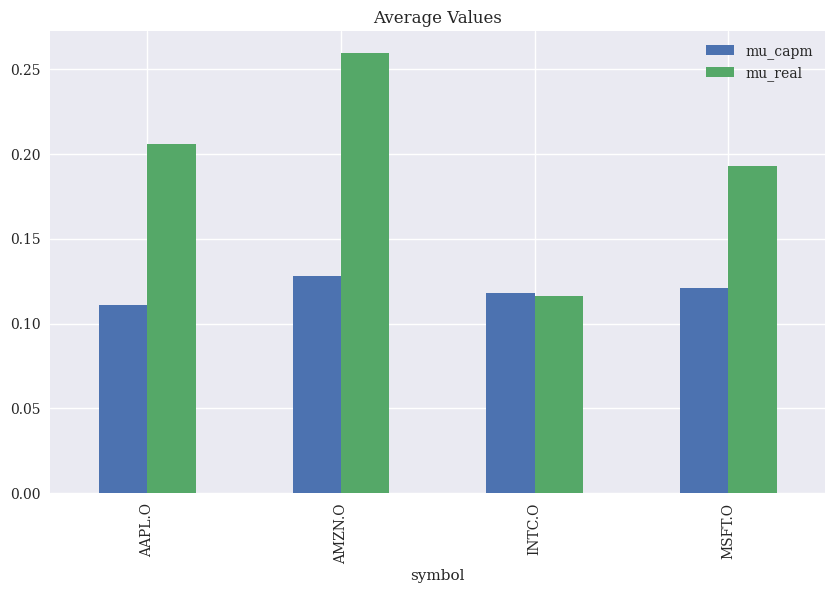

In [17]:
grouped.plot(kind='bar', figsize=(10, 6), title='Average Values');